In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
df = pd.read_csv("./Data/loan_data_set.csv")

# --> Handling NaN values

## Test and Train Split
- Before Handlind NaN values we are going to split the data because of data leakage

In [3]:
from sklearn.model_selection import train_test_split

X = df.drop('Loan_Status', axis = 1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

In [4]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

## 1. Gender
- if the applicant is married there is a high chance of male applicant
- Mode of Gender variable is 'Male'

<AxesSubplot:xlabel='Married', ylabel='count'>

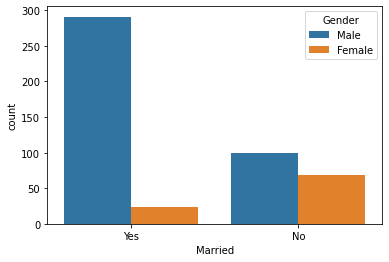

In [6]:
sns.countplot(x = X_train['Married'], hue = X_train['Gender'])

In [7]:
X_train[X_train['Gender'].isna() == True]['Married'].value_counts(dropna = False)

Yes    5
No     1
Name: Married, dtype: int64

In [8]:
X_train['Gender'] = X_train['Gender'].fillna('Male')
X_test['Gender'] = X_test['Gender'].fillna('Male')

## 2. Married

In [9]:
X_train['Married'].value_counts(dropna = False)

Yes    319
No     169
NaN      3
Name: Married, dtype: int64

In [10]:
X_train['Married'] = X_train['Married'].fillna(X_train['Married'].mode()[0])
X_test['Married'] = X_test['Married'].fillna(X_train['Married'].mode()[0])


## 3. Dependents
- Mode of Dependents feature is '0'

In [11]:
X_train['Dependents'].value_counts(dropna = False)

0      271
2       85
1       77
3+      43
NaN     15
Name: Dependents, dtype: int64

In [12]:
X_train[X_train['Dependents'].isna() == True]['Married'].value_counts(dropna = False)

Yes    11
No      4
Name: Married, dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

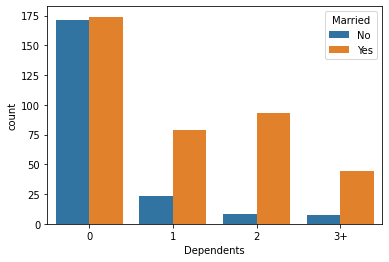

In [13]:
sns.countplot(x = df['Dependents'], hue = df['Married'])

In [14]:
X_test['Dependents'] = X_test['Dependents'].fillna(X_train['Dependents'].mode()[0])
X_train['Dependents'] = X_train['Dependents'].fillna(X_train['Dependents'].mode()[0])


In [15]:
X_train['Dependents'] = X_train['Dependents'].replace('3+', 3).astype('int64')
X_test['Dependents'] = X_test['Dependents'].replace('3+', 3).astype('int64')


## 4. Self_Employed

In [16]:
X_train['Self_Employed'].value_counts(dropna = False)

No     398
Yes     68
NaN     25
Name: Self_Employed, dtype: int64

In [17]:
X_train['Self_Employed'] = X_train['Self_Employed'].fillna(X_train['Self_Employed'].mode()[0])
X_test['Self_Employed'] = X_test['Self_Employed'].fillna(X_train['Self_Employed'].mode()[0])


## 5. LoanAmount

In [18]:
X_train['LoanAmount'].isna().sum()

18

In [19]:
X_train['LoanAmount'].mean()

142.92389006342495

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

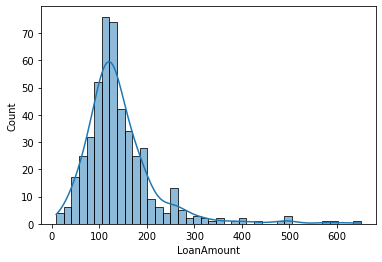

In [20]:
sns.histplot(X_train['LoanAmount'], kde = True)

In [21]:
X_train['LoanAmount'].median()

127.0

In [22]:
X_train['LoanAmount'] = X_train['LoanAmount'].fillna(X_train['LoanAmount'].median())
X_test['LoanAmount'] = X_test['LoanAmount'].fillna(X_train['LoanAmount'].median())

## 6. Loan_Amount_Term

In [23]:
X_train['Loan_Amount_Term'].value_counts(dropna = False)

360.0    408
180.0     39
480.0     13
300.0     11
NaN        8
240.0      3
120.0      3
36.0       2
84.0       2
60.0       2
Name: Loan_Amount_Term, dtype: int64

In [24]:
X_train['Loan_Amount_Term'] = X_train['Loan_Amount_Term'].fillna(360)
X_test['Loan_Amount_Term'] = X_test['Loan_Amount_Term'].fillna(360)

## 7. Credit_History

In [25]:
X_train['Credit_History'].value_counts(dropna = False)

1.0    385
0.0     69
NaN     37
Name: Credit_History, dtype: int64

In [26]:
X_train['Credit_History'] = X_train['Credit_History'].fillna(1)
X_test['Credit_History'] = X_test['Credit_History'].fillna(1)

In [27]:
X_train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# --> Handling Categorical values

## 1. Gender

In [28]:
X_train['Gender'] = X_train['Gender'].apply(lambda x: 0 if x == 'Male' else 1)
X_test['Gender'] = X_test['Gender'].apply(lambda x: 0 if x == 'Male' else 1)

## 2. Married

In [29]:
X_train['Married'] = X_train['Married'].apply(lambda x: 0 if x == 'Yes' else 1)
X_test['Married'] = X_test['Married'].apply(lambda x: 0 if x == 'Yes' else 1)

## 3. Property_Area

In [30]:
from sklearn.preprocessing import OneHotEncoder

In [31]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

cat_X_train = pd.DataFrame(encoder.fit_transform(X_train[['Property_Area']]),
                           columns = {'Property_Rural', 'Property_Semiurban', 'Property_Urban'})
cat_X_train.index = X_train.index
X_train = X_train.join(cat_X_train)

cat_X_test = pd.DataFrame(encoder.transform(X_test[['Property_Area']]), 
                         columns = {'Property_Rural', 'Property_Semiurban', 'Property_Urban'})
cat_X_test.index = X_test.index
X_test = X_test.join(cat_X_test)

In [32]:
X_test = X_test.drop(['Property_Area'], axis = 1)
X_train = X_train.drop(['Property_Area'], axis = 1)

## 4. Education

In [33]:
X_train['Education'].value_counts(dropna = False)

Graduate        379
Not Graduate    112
Name: Education, dtype: int64

In [34]:
X_train['Education'] = X_train['Education'].apply(lambda x: 0 if x == 'Graduate' else 1)
X_test['Education'] = X_test['Education'].apply(lambda x: 0 if x == 'Graduate' else 1)

## 5. Self_Employed

In [35]:
X_train['Self_Employed'].value_counts(dropna = False)

No     423
Yes     68
Name: Self_Employed, dtype: int64

In [36]:
X_train['Self_Employed'] = X_train['Self_Employed'].apply(lambda x: 0 if x == 'Yes' else 1)
X_test['Self_Employed'] = X_test['Self_Employed'].apply(lambda x: 0 if x == 'Yes' else 1)

In [37]:
X_train = X_train.drop(['Loan_ID'], axis = 1)
X_test = X_test.drop(['Loan_ID'], axis = 1)

# Feature Engineering

## Total Income = ApplicantIncome + CoapplicantIncome

In [38]:
# X_train['ApplicantIncome'] + X_train['CoapplicantIncome']

In [39]:
X_train['TotalIncome'] = X_train['ApplicantIncome'] + X_train['CoapplicantIncome']
X_test['TotalIncome'] = X_test['ApplicantIncome'] + X_test['CoapplicantIncome']

In [40]:
X_train = X_train.drop(['ApplicantIncome', 'CoapplicantIncome'], axis = 1)
X_test = X_test.drop(['ApplicantIncome', 'CoapplicantIncome'], axis = 1)

In [41]:
# X_train = X_train.drop(['Self_Employed'], axis = 1)
# X_test = X_test.drop(['Self_Employed'], axis = 1)

In [42]:
# X_train = X_train.drop(['Education'], axis = 1)
# X_test = X_test.drop(['Education'], axis = 1)

In [43]:
# X_train = X_train.drop(['Credit_History'], axis = 1)
# X_test = X_test.drop(['Credit_History'], axis = 1)

In [44]:
# X_train = X_train.drop(['Dependents'], axis = 1)
# X_test = X_test.drop(['Dependents'], axis = 1)

In [45]:
# X_train = X_train.drop(['Married'], axis = 1)
# X_test = X_test.drop(['Married'], axis = 1)

In [46]:
# X_train = X_train.drop(['Gender'], axis = 1)
# X_test = X_test.drop(['Gender'], axis = 1)

In [47]:
# X_train = X_train.drop(['Loan_Amount_Term'], axis = 1)
# X_test = X_test.drop(['Loan_Amount_Term'], axis = 1)

In [48]:
# X_train = X_train.drop(['LoanAmount'], axis = 1)
# X_test = X_test.drop(['LoanAmount'], axis = 1)

In [49]:
# X_train = X_train.drop(['Property_Rural', 'Property_Semiurban', 'Property_Urban'], axis = 1)
# X_test = X_test.drop(['Property_Rural', 'Property_Semiurban', 'Property_Urban'], axis = 1)

In [50]:
X_train.join(y_train)[X_train.join(y_train)['Loan_Status'] == 'N']

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Semiurban,Property_Rural,Property_Urban,TotalIncome,Loan_Status
172,0,0,3,1,1,81.0,180.0,1.0,1.0,0.0,0.0,3522.0,N
546,0,1,0,1,1,80.0,36.0,1.0,0.0,1.0,0.0,3358.0,N
431,0,1,0,0,1,105.0,360.0,0.0,1.0,0.0,0.0,6500.0,N
241,0,0,1,1,1,140.0,180.0,1.0,0.0,0.0,1.0,4493.0,N
596,0,0,2,1,0,187.0,360.0,1.0,1.0,0.0,0.0,7383.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,0,1,0,0,1,242.0,360.0,0.0,0.0,1.0,0.0,14999.0,N
576,0,0,0,0,1,136.0,360.0,0.0,0.0,1.0,0.0,5297.0,N
245,0,1,0,0,0,120.0,180.0,1.0,0.0,0.0,1.0,10383.0,N
174,0,0,0,1,0,87.0,360.0,1.0,0.0,1.0,0.0,5080.0,N


In [51]:
# X_test.to_csv('test.csv')

# SMOT Technique
- To deal with imbalance dataset

In [52]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [53]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Semiurban,Property_Rural,Property_Urban,TotalIncome
0,0,0,3,1,1,81.0,180.0,1.0,1.0,0.0,0.0,3522.0
1,0,1,2,0,1,162.0,360.0,1.0,1.0,0.0,0.0,10180.0
2,0,0,0,0,1,150.0,360.0,1.0,0.0,1.0,0.0,4843.0
3,0,0,0,0,0,191.0,360.0,1.0,0.0,1.0,0.0,9560.0
4,0,0,0,0,1,160.0,360.0,1.0,0.0,0.0,1.0,6256.0


## Outlier

<AxesSubplot:xlabel='TotalIncome', ylabel='Count'>

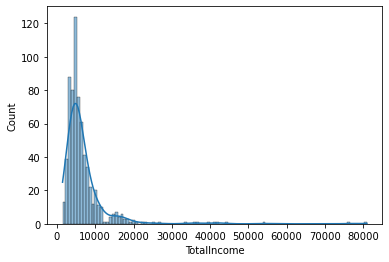

In [54]:
sns.histplot(X_train['TotalIncome'], kde = True)

In [55]:
X_train['LoanAmount'] = np.log(X_train['LoanAmount'])
X_test['LoanAmount'] = np.log(X_test['LoanAmount'])

In [56]:
X_train['TotalIncome'] = np.log(X_train['TotalIncome'])
X_test['TotalIncome'] = np.log(X_test['TotalIncome'])

In [57]:
X_test.to_csv('test.csv')

## Standardization

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
# std = StandardScaler()

# clm = X_train.columns

# X_train_std = pd.DataFrame(std.fit_transform(X_train), columns=clm)
# X_train_std.index = X_train.index
# X_train = X_train_std

# X_test_std = pd.DataFrame(std.transform(X_test), columns=clm)
# X_test_std.index = X_test.index
# X_test = X_test_std

# Model

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [61]:
# model = LogisticRegression(random_state = 18)
# model.fit(X_train, y_train)

# pred = model.predict(X_test)

In [62]:
# print(confusion_matrix(y_test, pred))
# print(classification_report(y_test, pred))

### First Model without outlier and without std
- [[18 25]
- [ 2 78]]
              precision    recall  f1-score   support

           N       0.90      0.42      0.57        43
           Y       0.76      0.97      0.85        80

- accuracy                           0.78       123
- macro avg       0.83      0.70      0.71       123
- weighted avg       0.81      0.78      0.75       123
- accuracy_score = **0.7804878048780488**

### With Standardization and After Handling Outliers
- Still get the same result, thats why I am not using Standardization and Outliers 
- accuracy_score = **0.7804878048780488**

### With SMOT
- [[22 21]
- [ 5 75]]
              precision    recall  f1-score   support

           N       0.81      0.51      0.63        43
           Y       0.78      0.94      0.85        80

- accuracy                           0.79       123
- macro avg       0.80      0.72      0.74       123
- weighted avg       0.79      0.79      0.77       123


- accuracy_score = **0.7886178861788617**

# Pipeline

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([('st', StandardScaler()), ('mod', LogisticRegression(random_state=18))])

In [64]:
pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)
print(accuracy_score(y_test, pred))

0.7804878048780488


/home/sahil/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


## With Pipeline
- accuracy_score: 0.7967479674796748

In [65]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[19 24]
 [ 3 77]]
              precision    recall  f1-score   support

           N       0.86      0.44      0.58        43
           Y       0.76      0.96      0.85        80

    accuracy                           0.78       123
   macro avg       0.81      0.70      0.72       123
weighted avg       0.80      0.78      0.76       123



In [66]:
X_train.join(y_train).head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Semiurban,Property_Rural,Property_Urban,TotalIncome,Loan_Status
0,0,0,3,1,1,4.394449,180.0,1.0,1.0,0.0,0.0,8.166784,N
1,0,1,2,0,1,5.087596,360.0,1.0,1.0,0.0,0.0,9.228180,Y
2,0,0,0,0,1,5.010635,360.0,1.0,0.0,1.0,0.0,8.485290,Y
3,0,0,0,0,0,5.252273,360.0,1.0,0.0,1.0,0.0,9.165343,Y
4,0,0,0,0,1,5.075174,360.0,1.0,0.0,0.0,1.0,8.741296,Y


## SVM

In [67]:
# from sklearn.svm import SVC
# svc = SVC(kernel = 'poly')
# svc.fit(X_train, y_train)
# pred = svc.predict(X_test)

In [68]:
# print(confusion_matrix(y_test, pred))
# print(classification_report(y_test, pred))
# print(accuracy_score(y_test, pred))

#### accuracy score: **0.7317073170731707**

In [69]:
# y_test.to_csv('y_test.csv')

# Saving Model using 'Pickle'

In [70]:
# pickle.dump(model, open('model.pkl', 'wb'))

# Saving Model using 'Joblib'

In [71]:
# import joblib
# joblib.dump(pipe, 'pipe_model.pkl')

## Feature Importance

[0.01772088 0.02580559 0.04673573 0.02183345 0.01829172 0.14887514
 0.04919367 0.29925431 0.07341538 0.0638076  0.06248839 0.17257813]


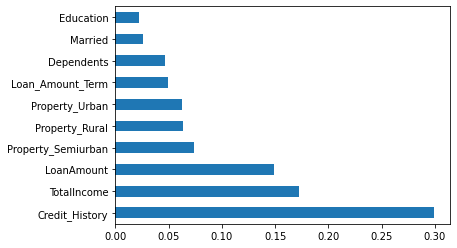

In [72]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()